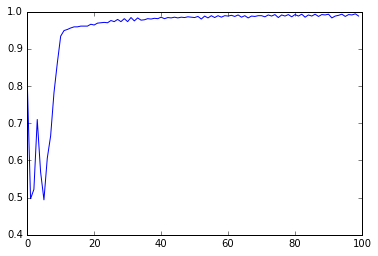

In [14]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
#import data
traindata=np.loadtxt("digits_training_data.csv",delimiter=",")
trainlabel=np.loadtxt("digits_training_labels.csv",delimiter=",")
#)1 (d)
c=3
ita=0.001
#Canonical Form
for i in range(trainlabel.size):
    if trainlabel[i]==4:
        trainlabel[i]=1
    else:
        trainlabel[i]=-1
w1=np.zeros(traindata[1,:].size)
b1=0
N1=np.arange(100)
accurate1=np.zeros(100) 
m=1
for j in range(1,101):
    wgrab1=w1
    alpha=np.float(ita)/(1+j*(np.float(ita)))
    for k in range(trainlabel.size):
        wgrab1=wgrab1-c*((trainlabel[k]*traindata[k,:]) if trainlabel[k]*(np.dot(traindata[k,:],w1.T)+b1)<1 else 0)
        bgrab1=-c*(trainlabel[k] if trainlabel[k]*(np.dot(traindata[k,:],w1.T)+b1)<1 else 0)
    
    w1=(w1-alpha*wgrab1)
    b1=(b1-alpha*bgrab1)
    #m=np.amin(np.abs(np.dot(traindata,w.T)+b))
    a=0
    for k in range(trainlabel.size):
        if trainlabel[k]*(np.dot(traindata[k,:],w1.T)+b1)>=1:
            a=a+1
        else:
            a=a
    accurate1[j-1]=np.float(a)/np.float(trainlabel.size)
plt.plot(N1,accurate1,label='iteration vs accuracy')
plt.savefig('plot1')

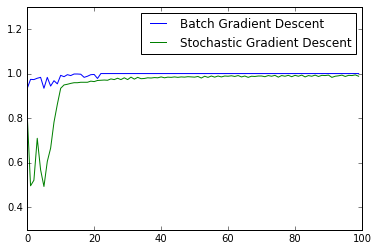

In [12]:
#(f)
w2=np.zeros(traindata[1,:].size)
b2=0
N=np.arange(100)
accurate2=np.zeros(100) 
m=1
for j in range(1,101):
    alpha=np.float(ita)/(1+j*(np.float(ita)))
    for k in np.random.permutation(trainlabel.size):
        wgrab2=w2/(trainlabel.size)
        wgrab2=wgrab2-c*((trainlabel[k]*traindata[k,:]) if trainlabel[k]*(np.dot(traindata[k,:],w2.T)+b2)<1 else 0)
        bgrab2=-c*(trainlabel[k] if trainlabel[k]*(np.dot(traindata[k,:],w2.T)+b2)<1 else 0)
        w2=(w2-alpha*wgrab2)
        b2=(b2-alpha*bgrab2)
    a=0
    for u in range(trainlabel.size):
        if trainlabel[u]*(np.dot(traindata[u,:],w2.T)+b2)>=1:
            a=a+1
        else:
            a=a
    accurate2[j-1]=np.float(a)/np.float(trainlabel.size)
#plt.plot(N,accurate2,"-g",N,accurate1,"-b")
plt.axis([0,100,0.3,1.3])
plt.plot(N,accurate2,label='Batch Gradient Descent') 
plt.plot(N,accurate1,label='Stochastic Gradient Descent') 
plt.legend()
plt.savefig('plot2')

In [16]:
#(i)
import sklearn
from sklearn import svm
testdata=np.loadtxt("digits_test_data.csv",delimiter=",")
testlabel=np.loadtxt("digits_test_labels.csv",delimiter=",")
for i in range(testlabel.size):
    if testlabel[i]==4:
        testlabel[i]=1
    else:
        testlabel[i]=-1
#gamma=np.logspace(-9.10,13,num=50)
#accurate2=np.zeros(50)
#for i in range(0,50):
#    clf=sklearn.svm.SVC(kernel="rbf",gamma=gamma[i],C=3)
#    clf.fit(traindata,trainlabel)
#    pre=clf.predict(testdata)
#    a=0
#    for u in range(testlabel.size):
#        if testlabel[u]==pre[u]:
#            a=a+1
#        else:
#           a=a
#    accurate2[i]=np.float(a)/np.float(testlabel.size)
#np.argmax(accurate2)
#gamma[6]
clf=svm.SVC(kernel="rbf",gamma=4.0375921650671599e-07,C=3)
clf.fit(traindata,trainlabel)
pre=clf.predict(testdata)
a=0
for u in range(testlabel.size):
    if testlabel[u]==pre[u]:
        a=a+1
    else:
        a=a
accurate=np.float(a)/np.float(testlabel.size)
testlabell=np.loadtxt("digits_test_labels.csv",delimiter=",")
diff=np.abs(testlabel-pre)

data = np.genfromtxt("digits_test_data.csv", delimiter=',')
N=np.zeros(7)
i=0
for k in range(0,500):
    if diff[k]!=0:
        N[i]=k
        i=i+1
    else:
        i=i
#plt.imshow(data[N[i]].reshape((26,26)), interpolation="nearest", cmap=cm.Greys_r)

In [17]:
N

array([ 122.,  163.,  165.,  209.,  329.,  390.,  468.])

In [3]:
#(j)
import sklearn
testdata=np.loadtxt("digits_test_data.csv",delimiter=",")
testlabel=np.loadtxt("digits_test_labels.csv",delimiter=",")
for i in range(testlabel.size):
    if testlabel[i]==4:
        testlabel[i]=1
    else:
        testlabel[i]=-1
#import data
traindata=np.loadtxt("digits_training_data.csv",delimiter=",")
trainlabel=np.loadtxt("digits_training_labels.csv",delimiter=",")
for i in range(trainlabel.size):
    if trainlabel[i]==4:
        trainlabel[i]=1
    else:
        trainlabel[i]=-1
#get pi 
pi1=(trainlabel==1).sum()
pi2=1000-pi1
pi11=np.float(pi1)/np.float(trainlabel.size)
pi22=1-pi11
mu1=np.zeros((traindata[1,:].size,1))
mu2=np.zeros((traindata[1,:].size,1))
sigma1=np.zeros((traindata[:,1].size,traindata[1,:].size))
for i in range(traindata[1,:].size):
    for j in range(trainlabel.size):
        if trainlabel[j]==1:
            mu1[i,0]=mu1[i,0]+(traindata[j,i])
        else:
            mu2[i,0]=mu2[i,0]+(traindata[j,i])
    mu1[i,0]=mu1[i,0]/pi1
    mu2[i,0]=mu2[i,0]/pi2
for j in range(trainlabel.size):
    if trainlabel[j]==1:
        sigma1[j:j+1,:]=traindata[j:j+1,:]-mu1.T 
    else:
        sigma1[j:j+1,:]=traindata[j:j+1,:]-mu2.T 
sigma=np.dot(sigma1.T,sigma1)/trainlabel.size
#gamma1=((-1/2)*np.dot(np.dot(mu1.T,np.linalg.pinv(sigma)),mu1))+np.log(pi11)
#gamma2=((-1/2)*np.dot(np.dot(mu2.T,np.linalg.pinv(sigma)),mu2))+np.log(pi22)
gamma1 = -0.5*mu1.T.dot(np.linalg.pinv(sigma)).dot(mu1)+np.log(pi11)
gamma2 = -0.5*mu2.T.dot(np.linalg.pinv(sigma)).dot(mu2)+np.log(pi22)
beta1=np.linalg.pinv(sigma).dot(mu1)
beta2=np.linalg.pinv(sigma).dot(mu2)


In [9]:
gamma1,gamma2

(array([[-42.98396815]]), array([[-51.37923301]]))

In [301]:
y=np.zeros(trainlabel.size)
ytest=np.zeros(testlabel.size)
yita1=np.zeros(trainlabel.size)
yita2=np.zeros(trainlabel.size)
yitat1=np.zeros(testlabel.size)
yitat2=np.zeros(testlabel.size)
for i in range(trainlabel.size):
    yita1[i]=np.exp(np.dot(beta1.T,traindata[i,:])+gamma1)
    yita2[i]=np.exp(np.dot(beta2.T,traindata[i,:])+gamma2)
for i in range(testlabel.size):
    yitat1[i]=np.exp(np.dot(beta1.T,testdata[i,:])+gamma1)
    yitat2[i]=np.exp(np.dot(beta2.T,testdata[i,:])+gamma2)
a=0
b=0
for i in range(trainlabel.size):
    p1=np.float(yita1[i])/np.float(yita1[i]+yita2[i])
    p2=np.float(yita2[i])/np.float(yita1[i]+yita2[i])
    if p1>p2:
        y[i]=1
        if y[i]==trainlabel[i]:
            a=a+1
        else:
            a=a
    else:
        y[i]=-1
        if y[i]==trainlabel[i]:
            a=a+1
        else:
            a=a
#test data 
for i in range(testlabel.size):
    p1=yitat1[i]/np.float(yitat1[i]+yitat2[i])
    p2=yitat2[i]/np.float(yitat1[i]+yitat2[i])
    if p1>p2:
        ytest[i]=1
        if ytest[i]==testlabel[i]:
            b=b+1
        else:
            b=b
    else:
        ytest[i]=-1
        if ytest[i]==testlabel[i]:
            b=b+1
        else:
            b=b
accuratey=np.float(a)/np.float(trainlabel.size)
accurateyt=np.float(b)/np.float(testlabel.size)
print accuratey
print accurateyt
  

0.997
0.894


C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in exp
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars


array([-0.05023303])

(1L, 1000L)

0.0